# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [2]:
!g++ sum.cpp -o sum
!./sum

5 10
15

### Test input output files

In [3]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [4]:
%%writefile output1.txt
12

Overwriting output1.txt


In [5]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [6]:
%%writefile output2.txt
4

Overwriting output2.txt


In [7]:
!./sum < input1.txt

12

In [8]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [9]:
!grep -xvFf output1.txt output1.txt 

In [10]:
!grep -xvFf output1.txt output2.txt 

4


In [11]:
!grep -xvFf output2.txt output1.txt 

12


In [12]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [13]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [14]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [15]:
!python sum.py

5 15
20


In [16]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [17]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [18]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product1.cpp


In [19]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

5 10 20 30 40 50
2000


### Test 1: Largest input numbers 200000 200000 in the input

In [20]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Overwriting input1.txt


In [21]:
!./max_pairwise_product1 < input1.txt

1345294336


In [22]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const vector<int>& numbers){
    int n = numbers.size();

    int max_index1 = -1;
    for(int i = 0; i<n ; i++){
        if((max_index1 == -1 )|| (numbers[i]> numbers[max_index1])){
            max_index1 = i;
        }
    }
    int max_index2 = -1;
    for(int j = 0; j<n ; j++){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
            max_index2 = j;
        }
    }
    return ((long long)(numbers[max_index1])) * numbers[max_index2];
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [23]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [24]:
%%writefile random_numbers.cpp
#include <iostream>
#include <stdlib.h>
#include <vector>
using namespace std;
int main(){
  int k = 0;
  while(k <= 200000){
  int tam = rand() % 1000;
  k++;
  cout << tam<<"\n";
  vector<int> arr;
  for(int i = 0; i < tam; i++){
      arr.push_back(rand()%10000);
      k++;
  }
  for(int i = 0; i < tam;i++ ){
      cout << arr[i]<<" ";
  }
  cout << "\n";
  }
  return 0;
}

Overwriting random_numbers.cpp


In [25]:
!g++ random_numbers.cpp -o random_numbers
!./random_numbers > salidagenerador.txt

In [26]:
%%writefile multi.cpp
#include <iostream>
using namespace std;
int main(){
  int n,m;
  for(int i = 0; i < 100000;i++){
  cin >> n >> m;
  cout << n <<" "<< m <<"\n";
  }
  return 0;
}

Overwriting multi.cpp


### Efficient solution 

In [27]:
%%writefile max_pairwise_productfast.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProductFast(const vector<int>& numbers){
    int n = numbers.size();

    int max_index1 = -1;
    for(int i = 0; i<n ; i++){
        if((max_index1 == -1 )|| (numbers[i]> numbers[max_index1])){
            max_index1 = i;
        }
    }
    int max_index2 = -1;
    for(int j = 0; j<n ; j++){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
            max_index2 = j;
        }
    }
    return ((long long)(numbers[max_index1])) * numbers[max_index2];
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProductFast(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_productfast.cpp


In [28]:
!g++ max_pairwise_productfast.cpp -o max_pairwise_productfast
%time
!./max_pairwise_productfast < input1.txt

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs
40000000000


Stress tests 


Measure with test file of the maximun n 200000 numbres 

In [29]:
%%writefile stresstests.cpp
#include <iostream>
#include <vector>
using namespace std;
long long MaxPairwiseProductFast(const vector<int>& numbers){
    int n = numbers.size();

    int max_index1 = -1;
    for(int i = 0; i<n ; i++){
        if((max_index1 == -1 )|| (numbers[i]> numbers[max_index1])){
            max_index1 = i;
        }
    }
    int max_index2 = -1;
    for(int j = 0; j<n ; j++){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
            max_index2 = j;
        }
    }
    return ((long long)(numbers[max_index1])) * numbers[max_index2];
}
long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}
int main(){ 
    while(true){
    int n; 
    cin >> n;
    vector<int> arr(n);
    for(int i = 0; i < n; i++ ){
        cin >> arr[i];
    }
    long long rapida = MaxPairwiseProductFast(arr);
    long long lenta = MaxPairwiseProduct(arr);
    if(rapida != lenta){
    cout << "Incorrecto"<<"\n";
    break;
    }else{
        cout << "Bien"<<"\n";
    }
    }
    return 0;
}

Overwriting stresstests.cpp


In [30]:
!g++ stresstests.cpp -o stress
%time
!./stress < salidagenerador.txt

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
B

## Python

####Efficcient solution python

In [31]:
def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product

if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))

5
10 20 30 40 50
2000


In [32]:
%time
max_pairwise_product([100000, 1000000 ,1000000000, 100000000, 11000001])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


100000000000000000

####Stress test

In [33]:
%%writefile stress_python.py
#python 3

def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product

def max_pairwise_product_fast(numbers):
    n = len(numbers)
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]   
def stress():
    counter = 0;
    limit = len(open("/content/salidagenerador.txt").readlines(  ))
    while True:
      input_n = int(input())
      input_numbers = [int(x) for x in input().split()]
      fast = max_pairwise_product(input_numbers)
      slow = max_pairwise_product_fast(input_numbers)
      counter = counter + 1
      if(counter <= limit and fast == slow):
        print("Bien")
      else: 
        print("Mal")
        return 
stress()

Overwriting stress_python.py


In [34]:
%time
!python stress_python.py < salidagenerador.txt

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.72 µs
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bien
Bi

## **Coursera Submissions Screenshots**


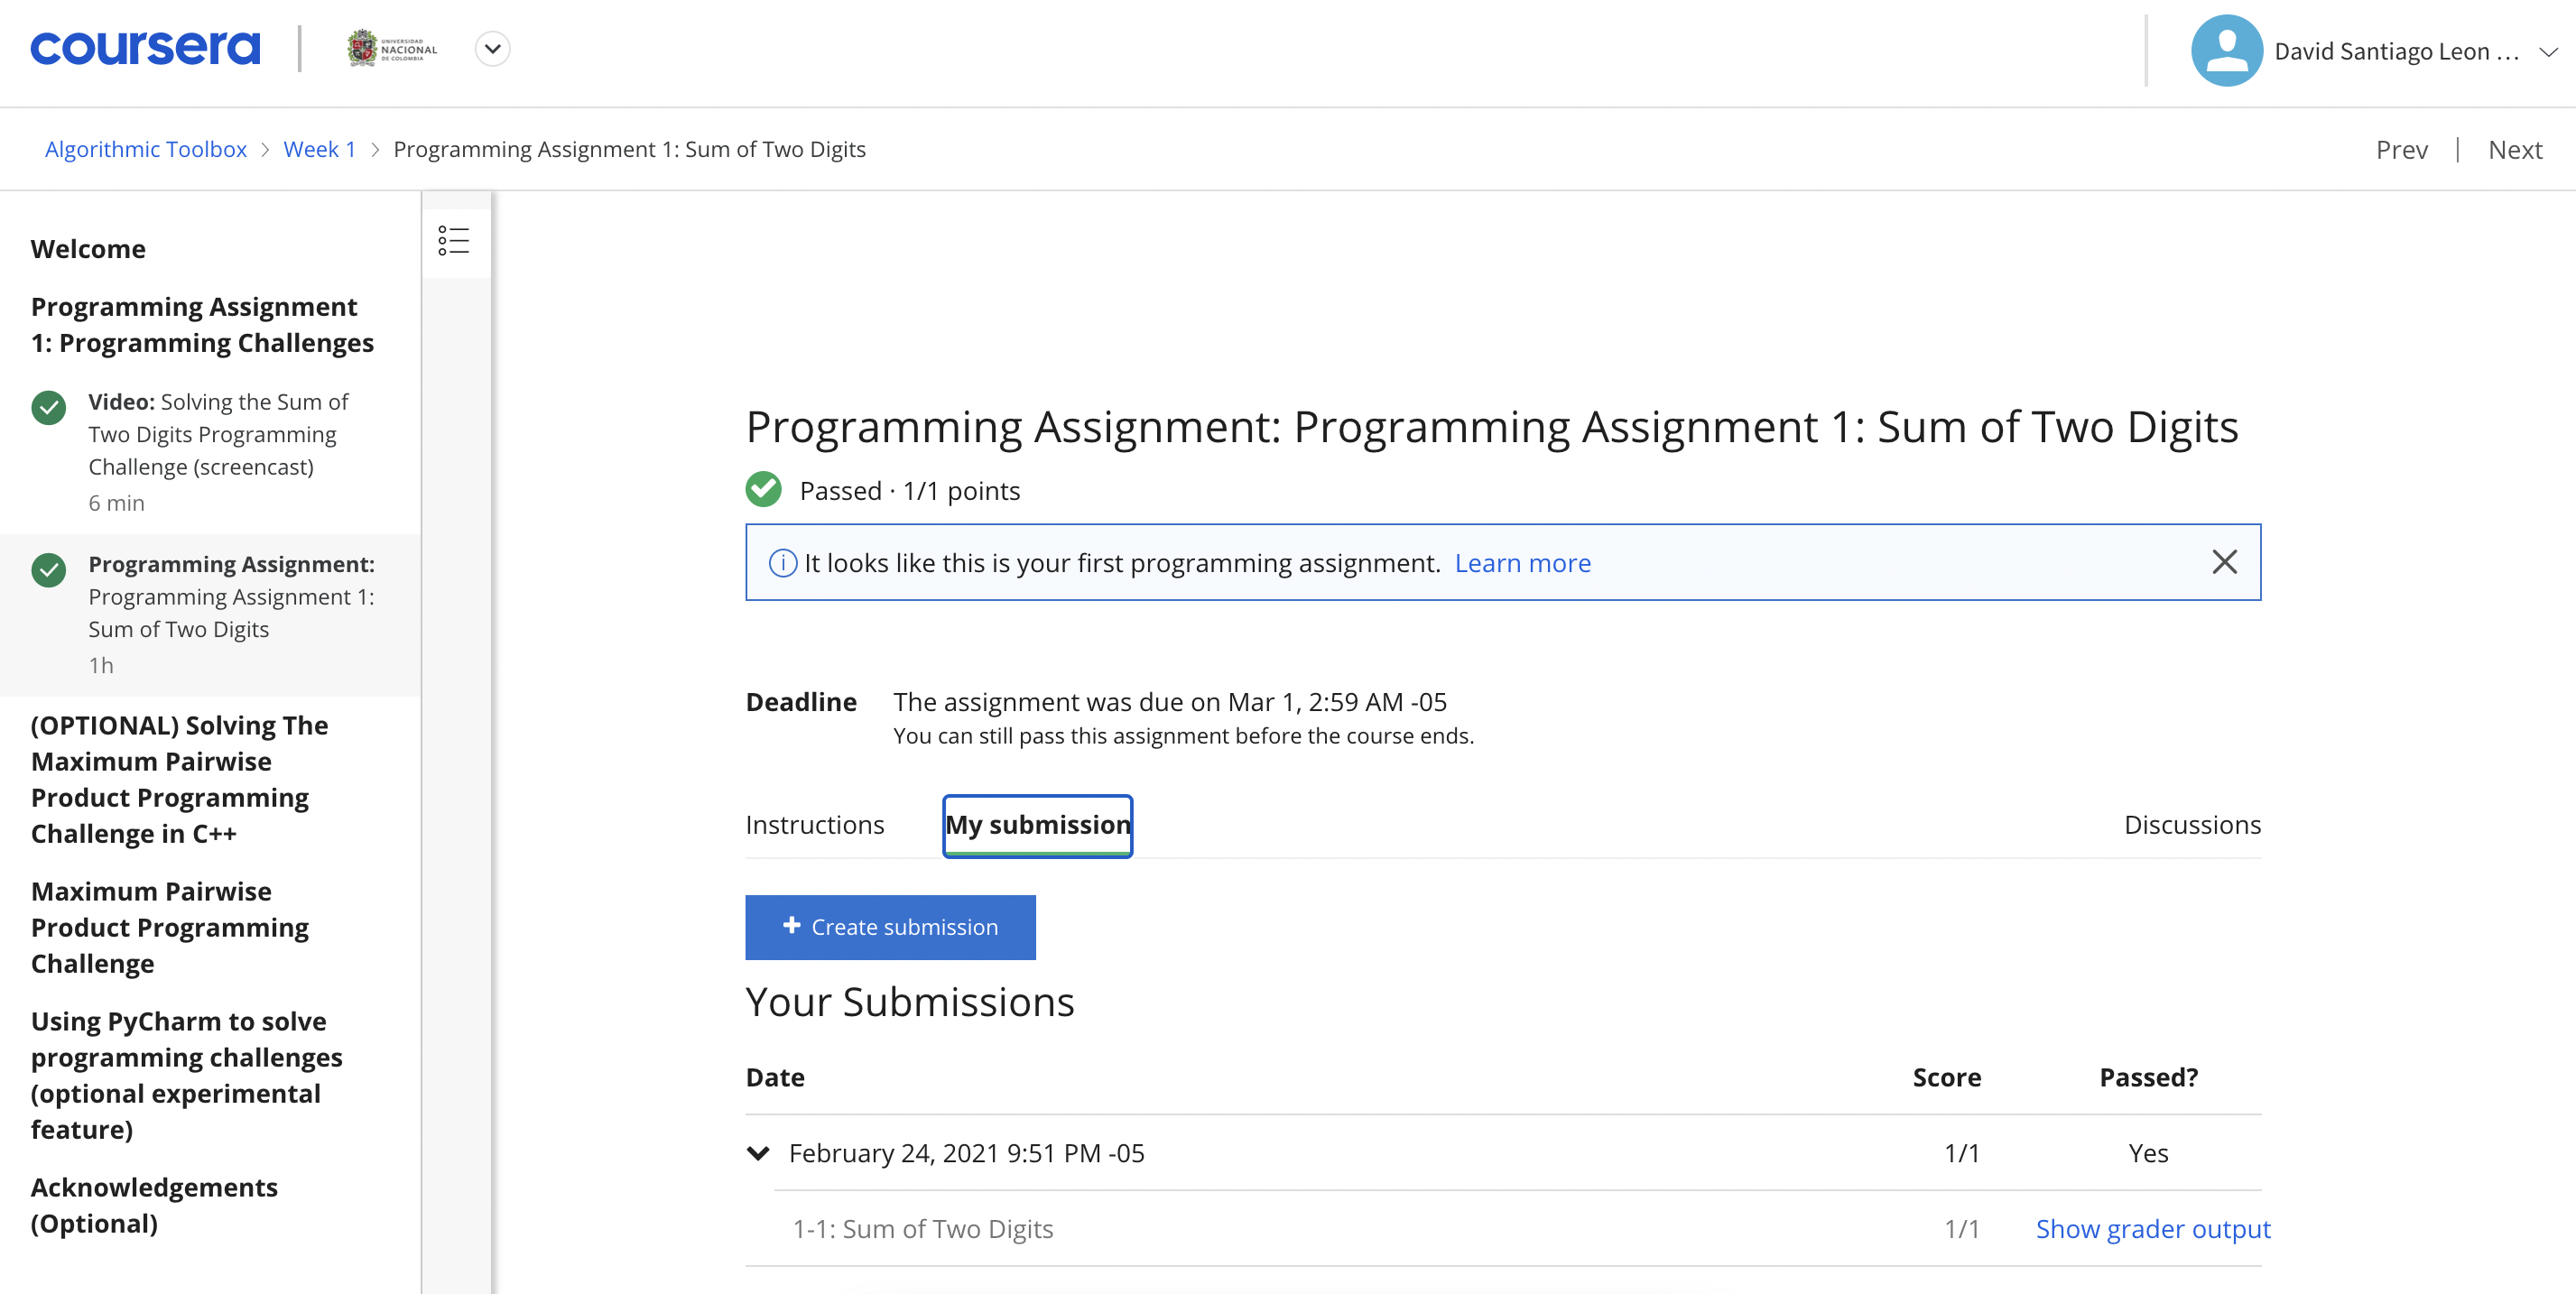

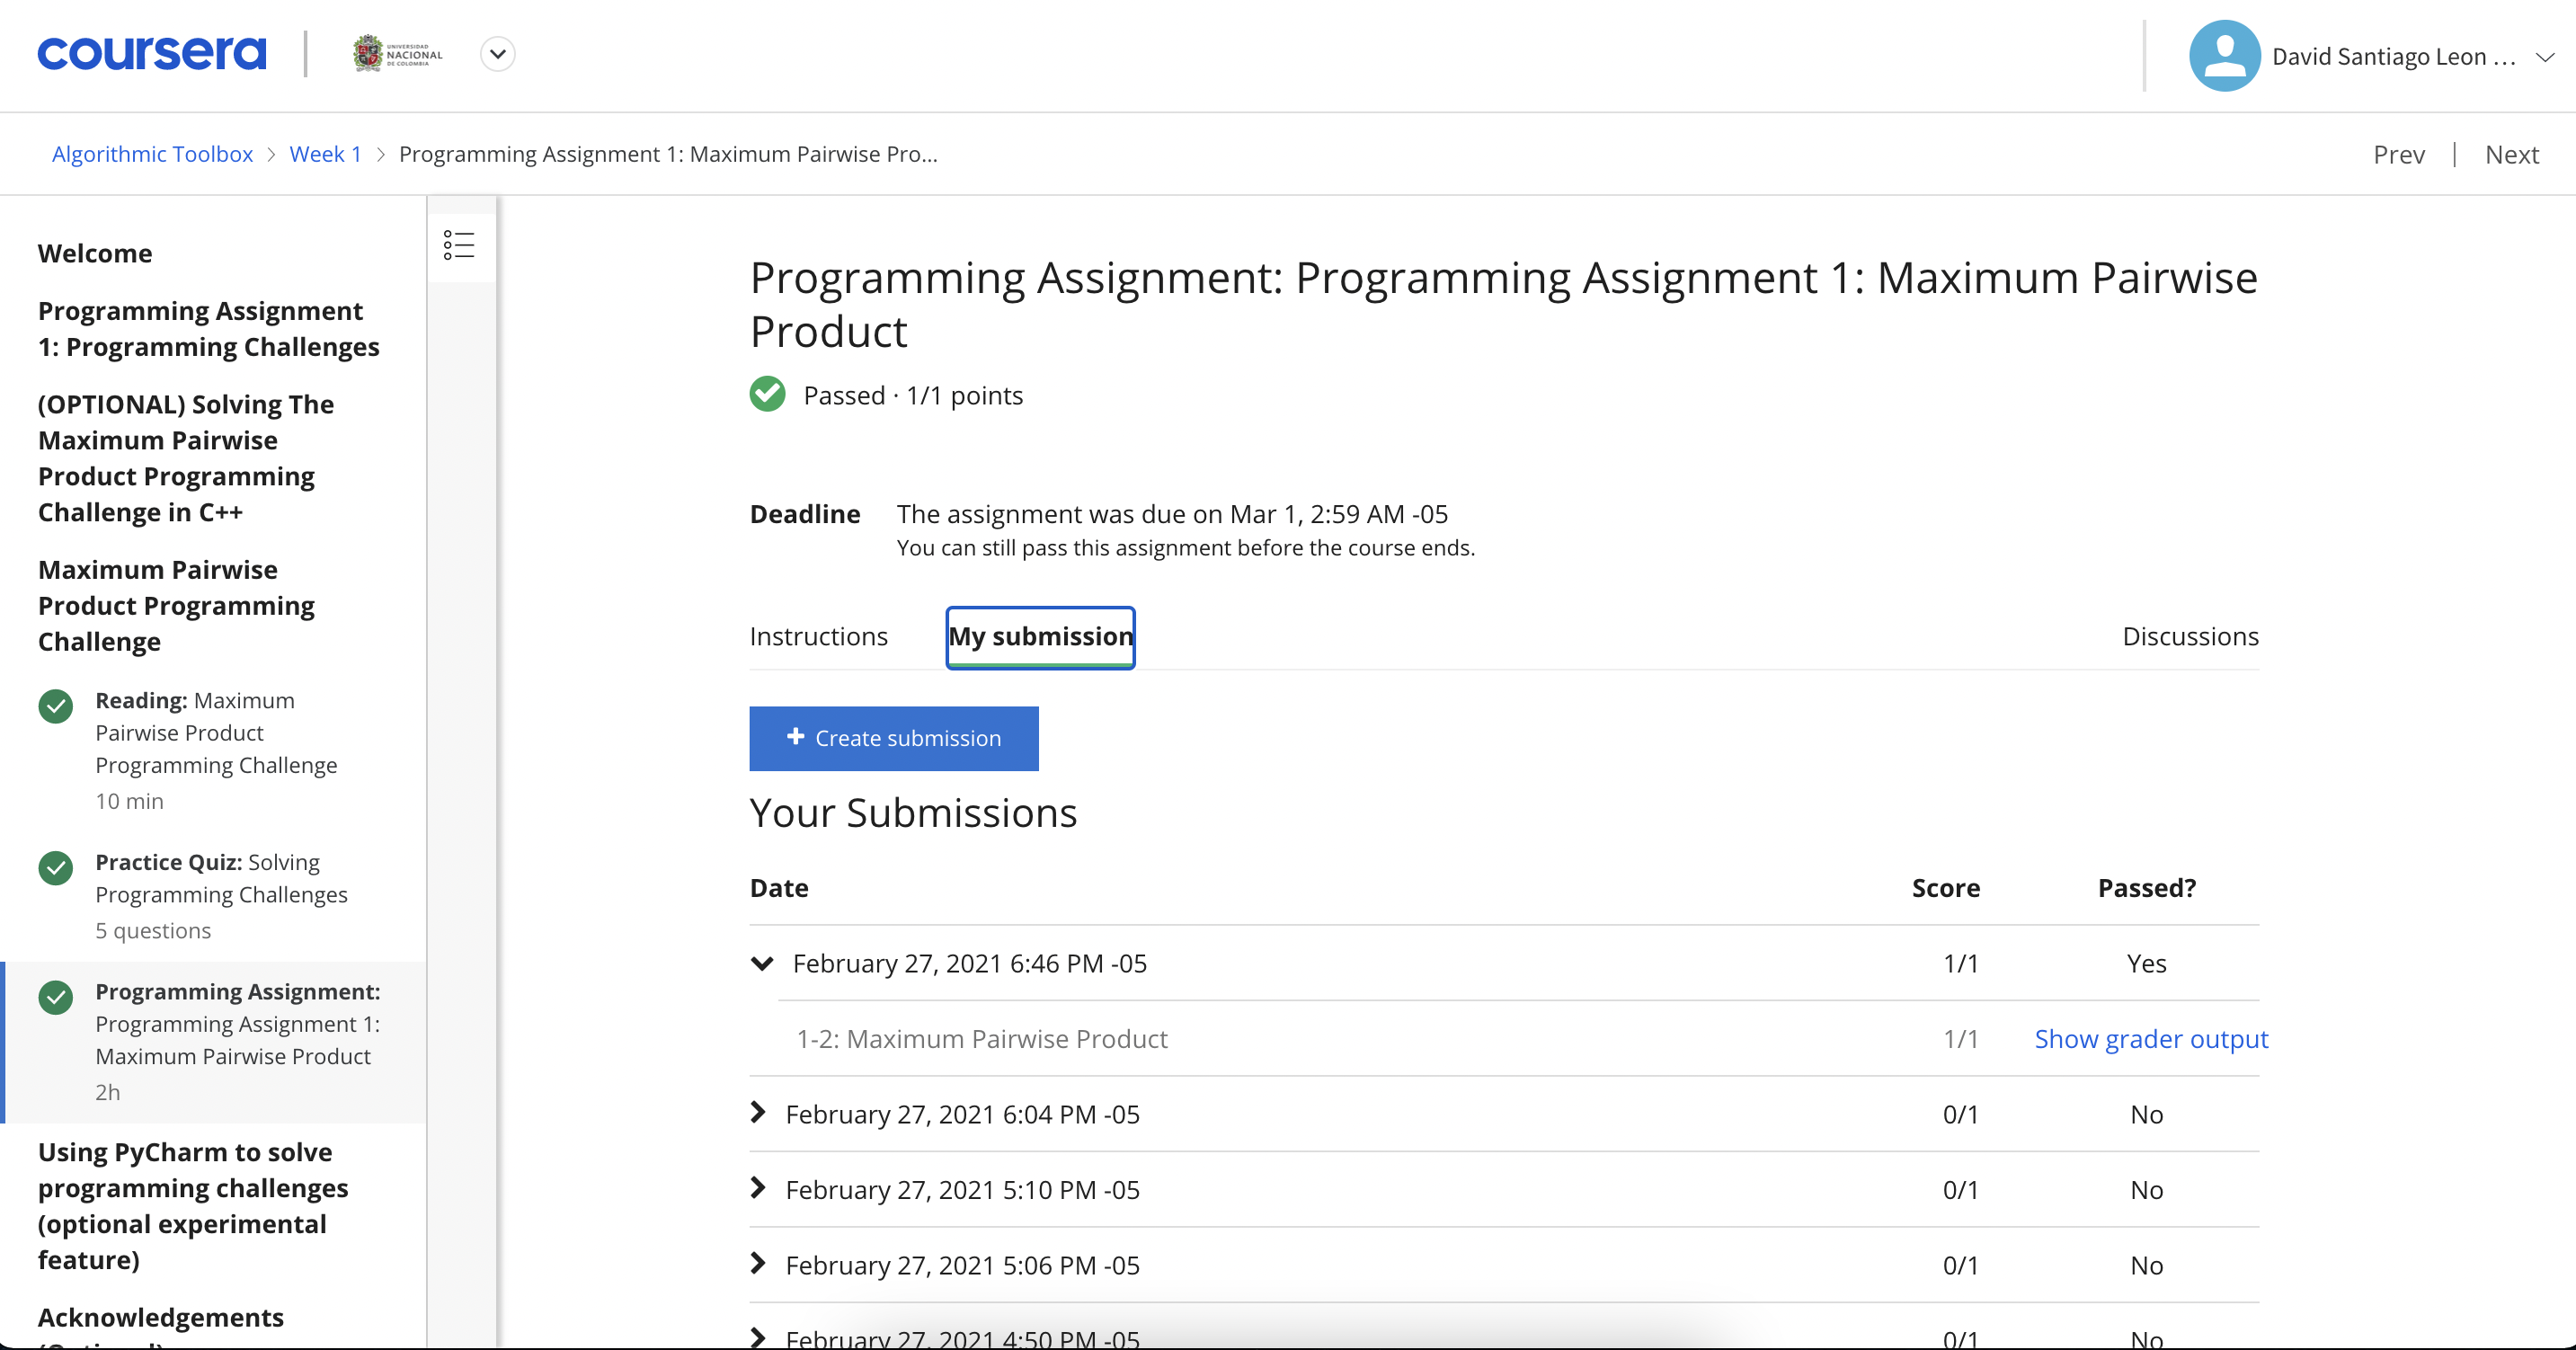